In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
df=pd.read_csv("./Churn_Modelling.csv")

In [31]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [35]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

### Using One Hot Coding to to convert categorial term to numerical term

In [36]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [37]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [39]:
print(df.dtypes)

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object


In [41]:
df[["Geography_Germany","Geography_Spain","Gender_Male"]] = df[["Geography_Germany","Geography_Spain","Gender_Male"]].astype(int)

In [42]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [46]:
X=df.drop("Exited",axis=1)
Y=df["Exited"]

In [47]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [65]:
X.shape

(10000, 11)

In [48]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Scaling dataset

#### Note: while using Neural Network always scale the dataset else it will take very long time to find values of weights and bais

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()

In [54]:
X_scaled=scaler.fit_transform(X)

In [55]:
X_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [56]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.33,random_state=45)

In [67]:
X_train.shape

(6700, 11)

### Making Neural Network using Tensorflow and Keras

#### Step 1 : importing librairies

In [90]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#### Step 2 : Calling model and adding layes

In [91]:
model= Sequential()

In [92]:
# Input Layer : model.add(Dense_layer(no._of_nodes,activation_function,input_columns))
model.add(Dense(11,activation="sigmoid",input_dim=11))

In [93]:
# 1st Hidden Layer : model.add(Dense_layer(no._of_nodes,activation_function))
model.add(Dense(10,activation="sigmoid"))

In [94]:
# Output Layer : model.add(Dense_layer(no._of_nodes,activation_function)) : if no._of_nodes = 1 : take activation = sigmoid or step function
model.add(Dense(1,activation="sigmoid"))

#### Step 3: summary of model

In [95]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263 (1.03 KB)

 Trainable params: 263 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

##### Total param : total trainable parameters

#### Step 4 : Model compilation

In [96]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

##### here we are using loss function as binary_cross_entropy since its binary classification problem
##### we use accuracy as metrics

#### Step 5 : Model fit

In [97]:
history=model.fit(X_train,Y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8035 - loss: 0.5708 - val_accuracy: 0.7955 - val_loss: 0.5054
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7979 - loss: 0.4980 - val_accuracy: 0.7955 - val_loss: 0.4930
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8018 - loss: 0.4817 - val_accuracy: 0.7955 - val_loss: 0.4824
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8028 - loss: 0.4688 - val_accuracy: 0.7955 - val_loss: 0.4694
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7999 - loss: 0.4626 - val_accuracy: 0.7955 - val_loss: 0.4571
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8066 - loss: 0.4401 - val_accuracy: 0.7955 - val_loss: 0.4472
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7878 - loss: 0.4498 - val_accuracy: 0.7948 - val_loss: 0.4402
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8059 - loss: 0.4216 - val_accu

##### Here We are taking no._of_epoch = 100 , verbose = 1 -> show training , validation_split = 0.2 -> among training dataset 20% dataset is tested simultaneously while training model
##### Accuracy : keeps increasing after every epoch
##### Loss : keeps decreasing after every epoch
##### val_loss : loss fraction in testing dataset of training dataset
##### val_Accuracy :  accuracy in testing dataset if training dataset

#### Step 6 : Prediction

In [98]:
Y_pred=model.predict(X_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [99]:
Y_pred

array([[0.04617487],
       [0.839041  ],
       [0.90122795],
       ...,
       [0.22039732],
       [0.17893809],
       [0.3157565 ]], dtype=float32)

##### Since we are using sigmoid as our activation function we get ouput b/w 0 - 1 : it tells probablity of getting exited from bank

In [100]:
Y_pred=Y_pred.argmax(axis=-1)

In [101]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Ckecking Accuracy of model

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
print("Accuracy of model :",accuracy_score(Y_test,Y_pred))

Accuracy of model : 0.7912121212121213


### Plotting curves

##### first we need to store model in some variable

Text(0.5, 1.0, 'Loss v/s val_loss Curve')

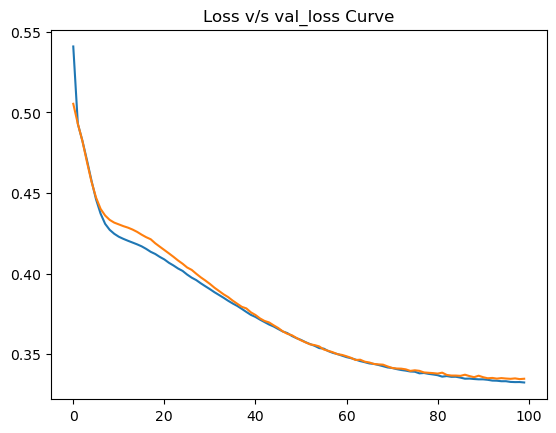

In [105]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss v/s val_loss Curve")

Text(0.5, 1.0, 'accuracy v/s val_accuracy curve')

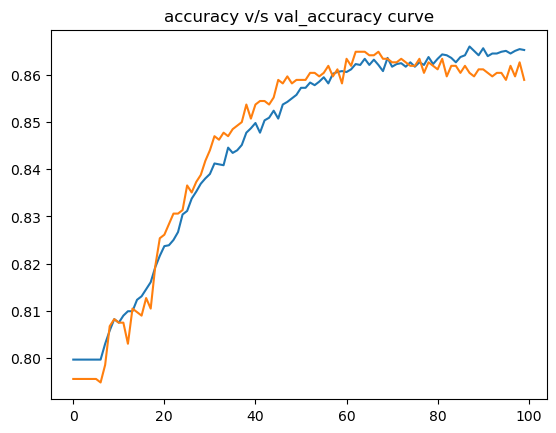

In [106]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy v/s val_accuracy curve")

## Ways to improve model performance

#### 1. Use "relu" as activation function
#### 2. Increase No. of nodes in hidden layers
#### 3. Increase No. of hidden layers
#### 4. Increase No. of epoch